In [1]:
import pandas as pd
import numpy as np 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
houses  = pd.read_csv("AmesHousing.tsv", delimiter = "\t")
houses.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [2]:
a = houses.isnull().sum().sort_values(ascending = False)
a_index = a[a.values > len(houses)/20].index
houses = houses.drop(a_index, axis = "columns")
houses.head()    

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,3,2010,WD,Normal,189900


In [3]:
num_null_index = houses.select_dtypes(include=['integer', 'float']).isnull().sum().sort_values(ascending = False)[:9].index
for i in num_null_index:
    houses[i] = houses[i].fillna(houses[i].mode()[0])
houses

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,4920,Pave,Reg,Lvl,AllPub,Inside,...,170,0,0,0,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,...,0,0,144,0,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,5389,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,3,2010,WD,Normal,236500
9,10,527162130,60,RL,7500,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2010,WD,Normal,189000


In [4]:
def train_and_test(df):
    train = df[:1460]
    test = df[1460:]
    num_cols = train.select_dtypes(include=['integer', 'float'])
    num_cols = [i for i in num_cols if i!= "SalePrice"]
    lr = LinearRegression()
    lr.fit(train[num_cols], train["SalePrice"])
    predictions = lr.predict(test[num_cols])
    mse = mean_squared_error(predictions,test["SalePrice"])
    rmse = mse**0.5
    return rmse
train_and_test(houses[["Gr Liv Area", "SalePrice"]])

57088.25161263909

In [5]:
years_sold = houses['Yr Sold'] - houses['Year Built']
years_since_remod = houses['Yr Sold'] - houses['Year Remod/Add']
houses['Years Before Sale'] = years_sold
houses['Years Since Remod'] = years_since_remod
houses = houses[houses["Years Before Sale"]>=0] 
houses = houses[houses["Years Since Remod"]>=0]
houses

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,Years Before Sale,Years Since Remod
0,1,526301100,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,5,2010,WD,Normal,215000,50,50
1,2,526350040,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,...,120,0,0,6,2010,WD,Normal,105000,49,49
2,3,526351010,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,12500,6,2010,WD,Normal,172000,52,52
3,4,526353030,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,4,2010,WD,Normal,244000,42,42
4,5,527105010,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,3,2010,WD,Normal,189900,13,12
5,6,527105030,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,6,2010,WD,Normal,195500,12,12
6,7,527127150,120,RL,4920,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,4,2010,WD,Normal,213500,9,9
7,8,527145080,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,...,144,0,0,1,2010,WD,Normal,191500,18,18
8,9,527146030,120,RL,5389,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,3,2010,WD,Normal,236500,15,14
9,10,527162130,60,RL,7500,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,6,2010,WD,Normal,189000,11,11


In [6]:
houses = houses.drop(["PID", "Order","Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"], axis=1)
houses

,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice,Years Before Sale,Years Since Remod
0,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,210,62,0,0,0,0,0,215000,50,50
1,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,140,0,0,0,120,0,0,105000,49,49
2,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,393,36,0,0,0,0,12500,172000,52,52
3,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,...,0,0,0,0,0,0,0,244000,42,42
4,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,212,34,0,0,0,0,0,189900,13,12
5,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,360,36,0,0,0,0,0,195500,12,12
6,120,RL,4920,Pave,Reg,Lvl,AllPub,Inside,Gtl,StoneBr,...,0,0,170,0,0,0,0,213500,9,9
7,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,...,0,82,0,0,144,0,0,191500,18,18
8,120,RL,5389,Pave,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,...,237,152,0,0,0,0,0,236500,15,14
9,60,RL,7500,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,140,60,0,0,0,0,0,189000,11,11


In [7]:
# def train_and_test(df):
#     train = df[:1460]
#     test = df[1460:]
#     num_cols = train.select_dtypes(include=['integer', 'float'])
#     num_cols = [i for i in num_cols if i!= "SalePrice"]
#     lr = LinearRegression()
#     lr.fit(train[num_cols], train["SalePrice"])
#     predictions = lr.predict(test[num_cols])
#     mse = mean_squared_error(predictions,test["SalePrice"])
#     rmse = mse**0.5
#     return rmse
train_and_test(houses[["Gr Liv Area", "SalePrice"]])

55275.36731241307

,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice,Years Before Sale,Years Since Remod
MS SubClass,1.000000,-0.204638,0.040285,-0.067498,0.036924,0.043740,0.005502,-0.058276,-0.070936,-0.129873,...,-0.016283,-0.013309,-0.022963,-0.037988,-0.050696,-0.003451,-0.024356,-0.085128,-0.037655,-0.044886
Lot Area,-0.204638,1.000000,0.090426,-0.033487,0.019977,0.018488,0.114982,0.180192,0.084454,0.020899,...,0.152849,0.089202,0.023004,0.016619,0.056135,0.094421,0.038013,0.267520,-0.020882,-0.019848
Overall Qual,0.040285,0.090426,1.000000,-0.093907,0.596404,0.568942,0.418972,0.278274,-0.040551,0.268760,...,0.253120,0.290553,-0.139907,0.018537,0.042412,0.030638,-0.027685,0.801206,-0.596358,-0.570231
Overall Cond,-0.067498,-0.033487,-0.093907,1.000000,-0.368471,0.048319,-0.132071,-0.050143,0.040846,-0.136758,...,0.021046,-0.067152,0.071287,0.043804,0.043915,-0.016822,0.047066,-0.101540,0.369267,-0.046373
Year Built,0.036924,0.019977,0.596404,-0.368471,1.000000,0.611549,0.305963,0.279569,-0.026990,0.127840,...,0.228135,0.194882,-0.374223,0.015941,-0.041119,0.002291,-0.028024,0.558490,-0.999054,-0.612407
Year Remod/Add,0.043740,0.018488,0.568942,0.048319,0.611549,1.000000,0.189846,0.150011,-0.061631,0.164044,...,0.217017,0.239191,-0.220124,0.037560,-0.046584,-0.011343,-0.018245,0.533007,-0.609186,-0.998006
Mas Vnr Area,0.005502,0.114982,0.418972,-0.132071,0.305963,0.189846,1.000000,0.284305,-0.014139,0.087535,...,0.158743,0.123395,-0.109775,0.014689,0.068366,0.005143,-0.022884,0.506983,-0.306163,-0.190821
BsmtFin SF 1,-0.058276,0.180192,0.278274,-0.050143,0.279569,0.150011,0.284305,1.000000,-0.053656,-0.487829,...,0.216577,0.105248,-0.100343,0.051644,0.098336,0.085531,0.015748,0.439284,-0.278070,-0.148456
BsmtFin SF 2,-0.070936,0.084454,-0.040551,0.040846,-0.026990,-0.061631,-0.014139,-0.053656,1.000000,-0.238304,...,0.099212,-0.003918,0.032310,-0.023347,0.062897,0.044386,-0.002650,0.006127,0.027250,0.062075
Bsmt Unf SF,-0.129873,0.020899,0.268760,-0.136758,0.127840,0.164044,0.087535,-0.487829,-0.238304,1.000000,...,-0.040532,0.113352,0.006913,-0.005256,-0.047593,-0.031912,-0.026767,0.182751,-0.129199,-0.166312


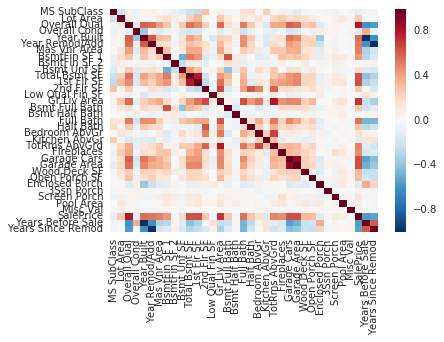

In [8]:
%matplotlib inline
numerical_houses = houses.select_dtypes(include=['integer', 'float'])
corr_df = numerical_houses.corr()
sns.heatmap(corr_df)
corr_df

In [9]:
best_feats = abs(corr_df["SalePrice"][abs(corr_df["SalePrice"]) > 0.4])
best_feats

Overall Qual         0.801206
Year Built           0.558490
Year Remod/Add       0.533007
Mas Vnr Area         0.506983
BsmtFin SF 1         0.439284
Total Bsmt SF        0.644012
1st Flr SF           0.635185
Gr Liv Area          0.717596
Full Bath            0.546118
TotRms AbvGrd        0.498574
Fireplaces           0.474831
Garage Cars          0.648361
Garage Area          0.641425
SalePrice            1.000000
Years Before Sale    0.558979
Years Since Remod    0.534985
Name: SalePrice, dtype: float64

In [10]:
# value_count_dic = { }
# for i in numerical_houses.columns:
#     value_count_dic[i] = numerical_houses[i].value_counts()

def select_features(df):
    cols = best_feats.index
    return df[cols]

data = select_features(houses)
train_and_test(data)

36626.12481909006

In [11]:
nominal_features = [ "MS SubClass", "MS Zoning", "Street", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air"]
dic = {}
for i in nominal_features:
    dic[i] = houses[i].value_counts()
dic

{'Bldg Type': 1Fam      2422
 TwnhsE     233
 Duplex     109
 Twnhs      101
 2fmCon      62
 Name: Bldg Type, dtype: int64, 'Central Air': Y    2731
 N     196
 Name: Central Air, dtype: int64, 'Condition 1': Norm      2520
 Feedr      164
 Artery      92
 RRAn        50
 PosN        38
 RRAe        28
 PosA        20
 RRNn         9
 RRNe         6
 Name: Condition 1, dtype: int64, 'Condition 2': Norm      2898
 Feedr       13
 Artery       5
 PosA         4
 PosN         3
 RRNn         2
 RRAn         1
 RRAe         1
 Name: Condition 2, dtype: int64, 'Exterior 1st': VinylSd    1025
 MetalSd     450
 HdBoard     442
 Wd Sdng     420
 Plywood     221
 CemntBd     124
 BrkFace      88
 WdShing      56
 AsbShng      44
 Stucco       43
 BrkComm       6
 AsphShn       2
 Stone         2
 CBlock        2
 PreCast       1
 ImStucc       1
 Name: Exterior 1st, dtype: int64, 'Exterior 2nd': VinylSd    1014
 MetalSd     447
 HdBoard     406
 Wd Sdng     397
 Plywood     274
 CmentBd     12

In [12]:
houses[nominal_features].isnull().sum()
houses["Mas Vnr Type"] = houses["Mas Vnr Type"].fillna("None")
houses[nominal_features].isnull().sum()

MS SubClass     0
MS Zoning       0
Street          0
Land Contour    0
Lot Config      0
Neighborhood    0
Condition 1     0
Condition 2     0
Bldg Type       0
House Style     0
Roof Style      0
Roof Matl       0
Exterior 1st    0
Exterior 2nd    0
Mas Vnr Type    0
Foundation      0
Heating         0
Central Air     0
dtype: int64

In [13]:
for i in nominal_features:
    houses[i] = houses[i].astype("category")

for col in nominal_features:
    dummy = pd.get_dummies(houses[col])
    houses = pd.concat([houses,dummy], axis = 1)
houses = houses.drop(nominal_features,axis =  "columns")
houses.shape

(2927, 207)

In [14]:
from sklearn.model_selection import KFold
def train_and_test_final(df,k):
    lr = LinearRegression()
    num_cols = df.select_dtypes(include=['integer', 'float'])
    num_cols = [i for i in num_cols if i!= "SalePrice"]

    if k==0:
        train = df[:1460]
        test = df[1460:]
        lr.fit(train[num_cols], train["SalePrice"])
        predictions = lr.predict(test[num_cols])
        mse = mean_squared_error(predictions,test["SalePrice"])
        rmse = mse**0.5
    if k==1:
        df = df.sample(frac = 1)
        fold_one = df[:1460]
        fold_two = df[1460:]
        lr.fit(fold_one[num_cols], fold_one["SalePrice"])
        predictions_one = lr.predict(fold_two[num_cols])
        mse_one = mean_squared_error(fold_two["SalePrice"], predictions_one)
        rmse_one = np.sqrt(mse_one)
        
        lr.fit(fold_two[features], fold_two["SalePrice"])
        predictions_two = lr.predict(fold_one[features])        
       
        mse_two = mean_squared_error(fold_one["SalePrice"], predictions_two)
        rmse_two = np.sqrt(mse_two)
        
        avg_rmse = np.mean([rmse_one, rmse_two])
        print(rmse_one)
        print(rmse_two)
        return avg_rmse
    else:
        kf = KFold(n_splits=k, shuffle=True)
        rmse_values = []
        for train_index, test_index, in kf.split(df):
            train = df.iloc[train_index]
            test = df.iloc[test_index]
            lr.fit(train[num_cols], train["SalePrice"])
            predictions = lr.predict(test[num_cols])
            mse = mean_squared_error(test["SalePrice"], predictions)
            rmse = np.sqrt(mse)
            rmse_values.append(rmse)
        print(rmse_values)
        avg_rmse = np.mean(rmse_values)
        return avg_rmse

In [15]:
train_and_test_final(houses,4)

[35165.97833632887, 26637.78155768799, 24050.17503747275, 25929.935818637212]


27945.967687531705